# Implementing the SARIMA model on abiotic data

In [8]:
import pandas as pd
import numpy as np

## 1. Importing the data

In [9]:
merged_df = pd.read_excel('../../data/MERGED_DATA_180624.xlsx', sheet_name='MERGE_FINAL')
display(merged_df.head(10))

,LOC_CODE,DATUM,TIJD,ZS [mg/l],ZICHT [dm],T [oC],SiO2 [umol/L],SALNTT [DIMSLS],PO4 [umol/L],pH [DIMSLS],...,Pde,Plo,Dpu,Rte,Fja,Hak,Mhe,Dno,Dat,interpolated_columns
0,DANTZGT,1990-01-10,15:00:00,135.0,2.0,4.0,20.178571,29.19,1.645161,7.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[]
1,DANTZGT,1990-02-06,13:40:00,295.0,0.5,6.0,19.803571,27.37,1.177419,7.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['SiO2 [umol/L]', 'PO4 [umol/L]', 'pH [DIMSLS]..."
2,DANTZGT,1990-03-08,13:45:00,103.0,3.0,7.3,19.428571,24.99,0.709677,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[]
3,DANTZGT,1990-04-04,10:00:00,113.0,3.0,8.2,6.285714,28.79,0.806452,8.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[]
4,DANTZGT,1990-05-09,15:30:00,20.0,11.0,17.4,1.714286,33.28,1.161290,8.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[]
5,DANTZGT,1990-06-20,13:00:00,33.0,10.0,18.1,8.607143,32.69,1.451613,8.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[]
6,DANTZGT,1990-07-18,12:15:00,39.0,4.0,17.0,6.071429,31.90,1.935484,8.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[]
7,DANTZGT,1990-08-15,09:40:00,15.0,8.0,21.0,3.714286,33.76,2.709677,8.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[]
8,DANTZGT,1990-09-19,16:25:00,29.0,3.0,15.1,9.607143,32.53,2.032258,8.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[]
9,DANTZGT,1990-10-17,15:15:00,65.0,4.0,13.8,10.142857,32.53,1.193548,7.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[]


In [10]:
print(list(merged_df.columns))

['LOC_CODE', 'DATUM', 'TIJD', 'ZS [mg/l]', 'ZICHT [dm]', 'T [oC]', 'SiO2 [umol/L]', 'SALNTT [DIMSLS]', 'PO4 [umol/L]', 'pH [DIMSLS]', 'NO3 [umol/L]', 'NO2 [umol/L]', 'NH4 [umol/L]', 'E [/m]', 'E_method', 'CHLFa [ug/l]', '    Q', 'PAR [J/m2d]', 'PAR [kJ/m2d]', 'kPAR_7d', 'kPAR_14d', 'DIN', 'DIN:SRP', 'DIN:SI', 'SRP:SI', 'IM [Jm2d]', 'Agl', 'Dbr', 'Ezo', 'Gde', 'Oau', 'Omo', 'Orh', 'Osi', 'Ram', 'Rse', 'Tec', 'Tle', 'Tni', 'Tro', 'Dle', 'Etr', 'Gfl', 'Gsp', 'Nsc', 'Pbi', 'Pbr', 'Pha', 'Stu', 'Kgl', 'Oro', 'Tor', 'Cdi', 'Cra', 'Ore', 'Ata', 'Cfu', 'Cgr', 'Lan', 'Pcl', 'Pmi', 'Pos', 'Pse', 'Cden', 'Aco', 'Dip', 'Csu', 'Mnu', 'Pco', 'Cdeb', 'Cwa', 'Pba', 'Dac', 'Ptr', 'Lun', 'Nsi', 'Rst', 'Pst', 'Acn', 'Tno', 'Ccu', 'Pan', 'Gfa', 'Hta', 'Dsp', 'Psu', 'Cei', 'Ndi', 'Cda', 'Dro', 'Cha', 'Pac', 'Cau', 'Coc', 'Pte', 'Edu', 'Mpe', 'Pde', 'Plo', 'Dpu', 'Rte', 'Fja', 'Hak', 'Mhe', 'Dno', 'Dat', 'interpolated_columns']


In [11]:
abiotic_columns = ['LOC_CODE', 'DATUM', 'TIJD', 'ZS [mg/l]', 'T [oC]', 'SiO2 [umol/L]', 'SALNTT [DIMSLS]',
                    'PO4 [umol/L]', 'pH [DIMSLS]', 'NO3 [umol/L]', 'NO2 [umol/L]', 'NH4 [umol/L]', 'E [/m]', 'CHLFa [ug/l]', 
                    '    Q', 'PAR [J/m2d]', 'PAR [kJ/m2d]', 'kPAR_7d', 'kPAR_14d', 'DIN', 'DIN:SRP', 'DIN:SI', 'SRP:SI', 'IM [Jm2d]']
abiotic_df = merged_df[abiotic_columns]

abiotic_df = abiotic_df.dropna()
abiotic_df.isna().sum()

LOC_CODE           0
DATUM              0
TIJD               0
ZS [mg/l]          0
T [oC]             0
SiO2 [umol/L]      0
SALNTT [DIMSLS]    0
PO4 [umol/L]       0
pH [DIMSLS]        0
NO3 [umol/L]       0
NO2 [umol/L]       0
NH4 [umol/L]       0
E [/m]             0
CHLFa [ug/l]       0
    Q              0
PAR [J/m2d]        0
PAR [kJ/m2d]       0
kPAR_7d            0
kPAR_14d           0
DIN                0
DIN:SRP            0
DIN:SI             0
SRP:SI             0
IM [Jm2d]          0
dtype: int64

## 2. Filter the Data on locations. 

In [12]:
numerical_abiotic_columns = ['ZS [mg/l]', 'T [oC]', 'SiO2 [umol/L]', 'SALNTT [DIMSLS]',
                    'PO4 [umol/L]', 'pH [DIMSLS]', 'NO3 [umol/L]', 'NO2 [umol/L]', 'NH4 [umol/L]', 'E [/m]', 'CHLFa [ug/l]', 
                    '    Q', 'PAR [J/m2d]', 'PAR [kJ/m2d]', 'kPAR_7d', 'kPAR_14d', 'DIN', 'DIN:SRP', 'DIN:SI', 'SRP:SI', 'IM [Jm2d]']

location_dict = {}

for location in abiotic_df['LOC_CODE'].unique():
    location_df = abiotic_df.loc[abiotic_df['LOC_CODE'] == location]
    location_df.index = pd.to_datetime(location_df['DATUM'])
    
    location_df = location_df[numerical_abiotic_columns]
    location_resampled = location_df.resample('M').mean()
    
    location_resampled.index.freq = 'M'

    # Calculate the exact split date
    exact_split_date = location_resampled.index[-1] - pd.DateOffset(years=2)

    # Find the nearest date in the DataFrame
    nearest_index = location_resampled.index.get_indexer([exact_split_date], method='nearest')[0]
    nearest_split_date = location_resampled.index[nearest_index]

    # Split the DataFrame into train and test sets
    train = location_resampled[location_resampled.index <= nearest_split_date]
    test = location_resampled[location_resampled.index > nearest_split_date]

    location_dict[location] = {}
    location_dict[location]["train"] = train
    location_dict[location]["test"] = test

    print(location, '\n' , location_resampled.isna().sum())


DANTZGT 
 ZS [mg/l]          33
T [oC]             33
SiO2 [umol/L]      33
SALNTT [DIMSLS]    33
PO4 [umol/L]       33
pH [DIMSLS]        33
NO3 [umol/L]       33
NO2 [umol/L]       33
NH4 [umol/L]       33
E [/m]             33
CHLFa [ug/l]       33
    Q              33
PAR [J/m2d]        33
PAR [kJ/m2d]       33
kPAR_7d            33
kPAR_14d           33
DIN                33
DIN:SRP            33
DIN:SI             33
SRP:SI             33
IM [Jm2d]          33
dtype: int64
DREISR 
 ZS [mg/l]          5
T [oC]             5
SiO2 [umol/L]      5
SALNTT [DIMSLS]    5
PO4 [umol/L]       5
pH [DIMSLS]        5
NO3 [umol/L]       5
NO2 [umol/L]       5
NH4 [umol/L]       5
E [/m]             5
CHLFa [ug/l]       5
    Q              5
PAR [J/m2d]        5
PAR [kJ/m2d]       5
kPAR_7d            5
kPAR_14d           5
DIN                5
DIN:SRP            5
DIN:SI             5
SRP:SI             5
IM [Jm2d]          5
dtype: int64


C:\Users\rijkj\AppData\Local\Temp\ipykernel_1220\3221962847.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  location_resampled = location_df.resample('M').mean()
C:\Users\rijkj\AppData\Local\Temp\ipykernel_1220\3221962847.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  location_resampled.index.freq = 'M'
C:\Users\rijkj\AppData\Local\Temp\ipykernel_1220\3221962847.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  location_resampled = location_df.resample('M').mean()
C:\Users\rijkj\AppData\Local\Temp\ipykernel_1220\3221962847.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  location_resampled.index.freq = 'M'
C:\Users\rijkj\AppData\Local\Temp\ipykernel_1220\3221962847.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please 

GOERE6 
 ZS [mg/l]          85
T [oC]             85
SiO2 [umol/L]      85
SALNTT [DIMSLS]    85
PO4 [umol/L]       85
pH [DIMSLS]        85
NO3 [umol/L]       85
NO2 [umol/L]       85
NH4 [umol/L]       85
E [/m]             85
CHLFa [ug/l]       85
    Q              85
PAR [J/m2d]        85
PAR [kJ/m2d]       85
kPAR_7d            85
kPAR_14d           85
DIN                85
DIN:SRP            85
DIN:SI             85
SRP:SI             85
IM [Jm2d]          85
dtype: int64
GROOTGND 
 ZS [mg/l]          12
T [oC]             12
SiO2 [umol/L]      12
SALNTT [DIMSLS]    12
PO4 [umol/L]       12
pH [DIMSLS]        12
NO3 [umol/L]       12
NO2 [umol/L]       12
NH4 [umol/L]       12
E [/m]             12
CHLFa [ug/l]       12
    Q              12
PAR [J/m2d]        12
PAR [kJ/m2d]       12
kPAR_7d            12
kPAR_14d           12
DIN                12
DIN:SRP            12
DIN:SI             12
SRP:SI             12
IM [Jm2d]          12
dtype: int64
HANSWGL 
 ZS [mg/l]          8

C:\Users\rijkj\AppData\Local\Temp\ipykernel_1220\3221962847.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  location_resampled.index.freq = 'M'
C:\Users\rijkj\AppData\Local\Temp\ipykernel_1220\3221962847.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  location_resampled = location_df.resample('M').mean()
C:\Users\rijkj\AppData\Local\Temp\ipykernel_1220\3221962847.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  location_resampled.index.freq = 'M'
C:\Users\rijkj\AppData\Local\Temp\ipykernel_1220\3221962847.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  location_resampled = location_df.resample('M').mean()
C:\Users\rijkj\AppData\Local\Temp\ipykernel_1220\3221962847.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please 

ROTTMPT50 
 ZS [mg/l]          221
T [oC]             221
SiO2 [umol/L]      221
SALNTT [DIMSLS]    221
PO4 [umol/L]       221
pH [DIMSLS]        221
NO3 [umol/L]       221
NO2 [umol/L]       221
NH4 [umol/L]       221
E [/m]             221
CHLFa [ug/l]       221
    Q              221
PAR [J/m2d]        221
PAR [kJ/m2d]       221
kPAR_7d            221
kPAR_14d           221
DIN                221
DIN:SRP            221
DIN:SI             221
SRP:SI             221
IM [Jm2d]          221
dtype: int64
ROTTMPT70 
 ZS [mg/l]          226
T [oC]             226
SiO2 [umol/L]      226
SALNTT [DIMSLS]    226
PO4 [umol/L]       226
pH [DIMSLS]        226
NO3 [umol/L]       226
NO2 [umol/L]       226
NH4 [umol/L]       226
E [/m]             226
CHLFa [ug/l]       226
    Q              226
PAR [J/m2d]        226
PAR [kJ/m2d]       226
kPAR_7d            226
kPAR_14d           226
DIN                226
DIN:SRP            226
DIN:SI             226
SRP:SI             226
IM [Jm2d]          2

C:\Users\rijkj\AppData\Local\Temp\ipykernel_1220\3221962847.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  location_resampled.index.freq = 'M'
C:\Users\rijkj\AppData\Local\Temp\ipykernel_1220\3221962847.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  location_resampled = location_df.resample('M').mean()
C:\Users\rijkj\AppData\Local\Temp\ipykernel_1220\3221962847.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  location_resampled.index.freq = 'M'
C:\Users\rijkj\AppData\Local\Temp\ipykernel_1220\3221962847.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  location_resampled = location_df.resample('M').mean()
C:\Users\rijkj\AppData\Local\Temp\ipykernel_1220\3221962847.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please 

## 3. Visualise the data

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# plot_df = abiotic_df.copy()
# # Ensure 'LOC_CODE' is categorical for better plotting

# # Assuming the 14 variables you want to plot are stored in a list
# variables_to_plot = ['ZS [mg/l]', 'T [oC]', 'SiO2 [umol/L]', 'SALNTT [DIMSLS]', 
#                      'PO4 [umol/L]', 'pH [DIMSLS]', 'NO3 [umol/L]', '  Q', 
#                      'PAR [J/m2d]', 'kPAR_7d', 'kPAR_14d', 'DIN', 
#                      'DIN:SRP', 'DIN:SI']

In [15]:
# # Set up the FacetGrid
# g = sns.FacetGrid(plot_df, col='LOC_CODE', col_wrap=4, height=3, sharex=False, sharey=False)

# # Map data to the grid
# g.map_dataframe(sns.lineplot, x='DATUM', y='T [oC]', hue='LOC_CODE', palette='Set2')

# # Set labels and title for each subplot
# g.set_axis_labels('Date', 'Value')
# g.set_titles(col_template='{col_name}')

# # Add a legend with adjusted parameters
# g.add_legend(title='Variables', fontsize='small')

# # Adjust layout
# plt.tight_layout()
# plt.show()


## 4. Train a model per location

In [17]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
%matplotlib ipympl

In [18]:

def preprocess_and_fit_sarima(df, variables_to_forecast, location):
    # Fit SARIMA model for each variable
    models = {}
    results = {}
    
    for variable in variables_to_forecast:
        variable_df = df[variable]
        # Define the SARIMA model - adjust parameters as needed
        model = SARIMAX(variable_df, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
        result = model.fit()
        models[variable] = model
        results[variable] = result

        # print(f'SARIMA model for {variable} at {location} fitted.')

    return models, results

# Define the variables to forecast
variables_to_forecast = numerical_abiotic_columns

# Dictionary to store results for each location
all_results = {}

# train per location on the training set
for location in ["DANTZGT"]:
    models, results = preprocess_and_fit_sarima(location_dict[location]['train'], variables_to_forecast, location)
    all_results[location] = results
    print(f'Model trained for {location}')

print("Models fitted for all locations.")


In [ ]:
results

{'ZS [mg/l]': <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper at 0x7319a3b7e980>,
 'T [oC]': <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper at 0x7319a3340ac0>,
 'SiO2 [umol/L]': <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper at 0x7319a3343ee0>,
 'SALNTT [DIMSLS]': <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper at 0x73199919cfd0>,
 'PO4 [umol/L]': <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper at 0x73199919e140>,
 'pH [DIMSLS]': <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper at 0x73199919df30>,
 'NO3 [umol/L]': <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper at 0x7319e58776d0>,
 'NO2 [umol/L]': <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper at 0x731999255390>,
 'NH4 [umol/L]': <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper at 0x7319992565c0>,
 'E [/m]': <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper at 0x731999257610>,
 'CHLFa [ug/l]': <statsmodels.tsa.statespace.sarimax.SARIMAXRe

DANTZGT
ZS [mg/l]
48
T [oC]
48


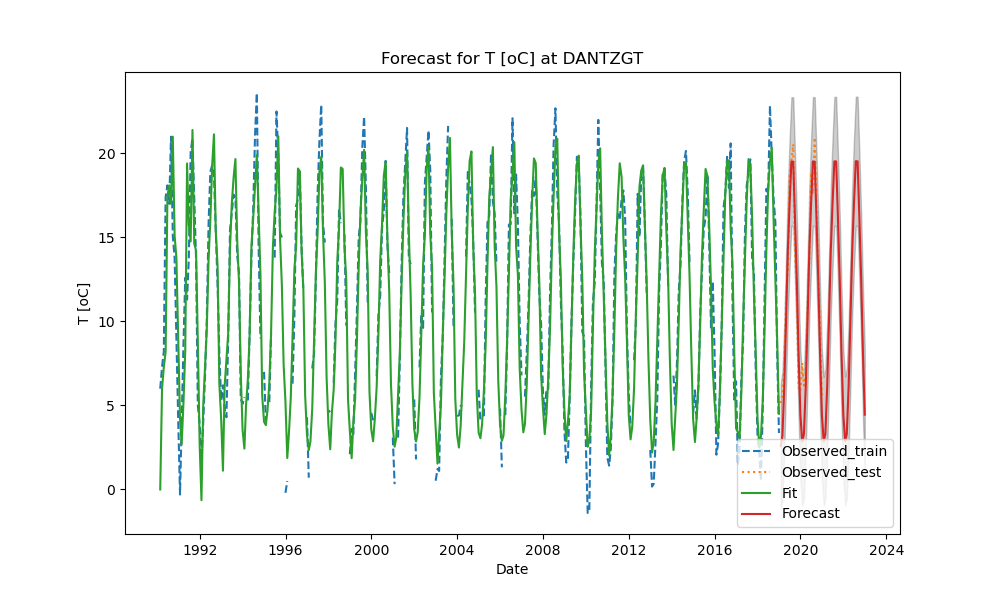

SiO2 [umol/L]
48
SALNTT [DIMSLS]
48
PO4 [umol/L]
48
pH [DIMSLS]
48
NO3 [umol/L]
48
NO2 [umol/L]
48
NH4 [umol/L]
48
E [/m]
48
CHLFa [ug/l]
48
    Q
48
PAR [J/m2d]
48
PAR [kJ/m2d]
48
kPAR_7d
48
kPAR_14d
48
DIN
48
DIN:SRP
48
DIN:SI
48
SRP:SI
48
IM [Jm2d]
48


In [ ]:
def make_forecasts_and_plot(results, df_resampled, variables_to_forecast):
    forecast_steps = 12  # Define forecast steps
    forecasts = pd.DataFrame()

    for variable in variables_to_forecast:
        forecast = results[variable].get_forecast(steps=forecast_steps)
        forecast_ci = forecast.conf_int()
        
        # Store forecasts
        forecasts[f'{variable}_forecast'] = forecast.predicted_mean
        forecasts[f'{variable}_lower_ci'] = forecast_ci.iloc[:, 0]
        forecasts[f'{variable}_upper_ci'] = forecast_ci.iloc[:, 1]
        
        

        return forecasts

forecast_steps = 48
forecasts = {}


for location in all_results:
    forecasts[location] = pd.DataFrame()
    print(location)
    for variable in all_results[location]:
        print(variable)
        forecast = all_results[location][variable].get_forecast(steps=forecast_steps)
        print(len(forecast.predicted_mean))
        forecast_ci = forecast.conf_int()
        fittdvalues = all_results[location][variable].fittedvalues

        # Store forecasts
        forecasts[location][f'{variable}_forecast'] = forecast.predicted_mean
        forecasts[location][f'{variable}_lower_ci'] = forecast_ci.iloc[:, 0]
        forecasts[location][f'{variable}_upper_ci'] = forecast_ci.iloc[:, 1]

        if variable == 'T [oC]':
            plt.figure(figsize=(10, 6))
            plt.plot(location_dict[location]['train'][variable], linestyle='--', label='Observed_train')
            plt.plot(location_dict[location]['test'][variable], linestyle=':', label='Observed_test')
            plt.plot(fittdvalues, label='Fit')
            plt.plot(forecast.predicted_mean, label='Forecast')
            plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='k', alpha=0.2)
            plt.title(f'Forecast for {variable} at {location}')
            plt.xlabel('Date')
            plt.ylabel(variable)
            plt.legend()
            plt.show()

In [ ]:
import sklearn.metrics as sm

# get performance metrics
mean_absolute_error_df = pd.DataFrame()
mean_squared_error_df = pd.DataFrame()
r2_df = pd.DataFrame()


for location in all_results:
    mean_absolute_error_loc = pd.Series()
    mean_squared_error_loc = pd.Series()
    r2_loc = pd.Series()

    y_true_dict = location_dict[location]['test']
    y_pred_dict = forecasts[location]

    for variable in variables_to_forecast:
        y_true = y_true_dict[variable].dropna()
        y_pred = y_pred_dict[f'{variable}_forecast']
        
        common_idx = y_true.index.intersection(y_pred.index)
        y_true_aligned = y_true.loc[common_idx]
        y_pred_aligned = y_pred.loc[common_idx]

        mean_absolute_error_loc[variable] = sm.mean_absolute_error(y_true_aligned, y_pred_aligned)
        mean_squared_error_loc[variable] = np.sqrt(sm.mean_absolute_error(y_true_aligned, y_pred_aligned))
        r2_loc[variable] = sm.r2_score(y_true_aligned, y_pred_aligned)

    mean_absolute_error_df[location] = mean_absolute_error_loc.T
    mean_squared_error_df[location] = mean_squared_error_loc.T
    r2_df[location] = r2_loc.T
    

In [ ]:
display(mean_absolute_error_df)
display('Mean Absolte Error Per column: ', mean_absolute_error_df.mean())
display('Mean Absolte Error Per row: ', mean_absolute_error_df.T.mean())
display('Mean Absolte Error total: ', mean_absolute_error_df.values.flatten().mean())

,DANTZGT
ZS [mg/l],3.449217e+01
T [oC],1.505815e+00
SiO2 [umol/L],4.055225e+00
SALNTT [DIMSLS],2.310230e+00
PO4 [umol/L],2.365043e-01
pH [DIMSLS],7.940848e-02
NO3 [umol/L],5.800706e+00
NO2 [umol/L],2.210737e-01
NH4 [umol/L],2.722062e+00
E [/m],1.172535e+00


'Mean Absolte Error Per column: '

DANTZGT    102734.055696
dtype: float64

'Mean Absolte Error Per row: '

ZS [mg/l]          3.449217e+01
T [oC]             1.505815e+00
SiO2 [umol/L]      4.055225e+00
SALNTT [DIMSLS]    2.310230e+00
PO4 [umol/L]       2.365043e-01
pH [DIMSLS]        7.940848e-02
NO3 [umol/L]       5.800706e+00
NO2 [umol/L]       2.210737e-01
NH4 [umol/L]       2.722062e+00
E [/m]             1.172535e+00
CHLFa [ug/l]       8.455331e+00
    Q              2.310234e+02
PAR [J/m2d]        1.079434e+06
PAR [kJ/m2d]       1.038175e+03
kPAR_7d            6.893250e+02
kPAR_14d           6.351038e+02
DIN                6.071899e+00
DIN:SRP            1.280902e+01
DIN:SI             8.353012e-01
SRP:SI             4.398807e-02
IM [Jm2d]          1.075307e+06
dtype: float64

'Mean Absolte Error total: '

102734.05569560632

In [ ]:
display(r2_df)
display('R2 Per column: ', r2_df.mean())
display('R2 Per Row: ', r2_df.T.mean())
display('R2 total: ', r2_df.values.flatten().mean())

,DANTZGT
ZS [mg/l],-0.065005
T [oC],0.887313
SiO2 [umol/L],0.636063
SALNTT [DIMSLS],-0.137994
PO4 [umol/L],-0.003341
pH [DIMSLS],-0.305538
NO3 [umol/L],0.770766
NO2 [umol/L],0.787747
NH4 [umol/L],0.419233
E [/m],-0.092849


'R2 Per column: '

DANTZGT    0.262155
dtype: float64

'R2 Per Row: '

ZS [mg/l]         -0.065005
T [oC]             0.887313
SiO2 [umol/L]      0.636063
SALNTT [DIMSLS]   -0.137994
PO4 [umol/L]      -0.003341
pH [DIMSLS]       -0.305538
NO3 [umol/L]       0.770766
NO2 [umol/L]       0.787747
NH4 [umol/L]       0.419233
E [/m]            -0.092849
CHLFa [ug/l]      -3.666101
    Q              0.815623
PAR [J/m2d]        0.805931
PAR [kJ/m2d]       0.815192
kPAR_7d            0.937179
kPAR_14d           0.941360
DIN                0.777063
DIN:SRP            0.674481
DIN:SI            -0.554409
SRP:SI             0.255933
IM [Jm2d]          0.806612
dtype: float64

'R2 total: '

0.26215519198239323

In [16]:
display(mean_squared_error_df)
display('mean_squared_error Per column: ', mean_squared_error_df.mean())
display('mean_squared_error Per Row: ', mean_squared_error_df.T.mean())
display('mean_squared_error total: ', mean_squared_error_df.values.flatten().mean())

,DANTZGT
ZS [mg/l],5.873004
T [oC],1.227116
SiO2 [umol/L],2.013759
SALNTT [DIMSLS],1.519944
PO4 [umol/L],0.486317
pH [DIMSLS],0.281795
NO3 [umol/L],2.408466
NO2 [umol/L],0.470185
NH4 [umol/L],1.649867
E [/m],1.082837


'mean_squared_error Per column: '

DANTZGT    104.85202
dtype: float64

'mean_squared_error Per Row: '

ZS [mg/l]             5.873004
T [oC]                1.227116
SiO2 [umol/L]         2.013759
SALNTT [DIMSLS]       1.519944
PO4 [umol/L]          0.486317
pH [DIMSLS]           0.281795
NO3 [umol/L]          2.408466
NO2 [umol/L]          0.470185
NH4 [umol/L]          1.649867
E [/m]                1.082837
CHLFa [ug/l]          2.907805
    Q                15.199455
PAR [J/m2d]        1038.958003
PAR [kJ/m2d]         32.220716
kPAR_7d              26.254999
kPAR_14d             25.201266
DIN                   2.464122
DIN:SRP               3.578969
DIN:SI                0.913948
SRP:SI                0.209733
IM [Jm2d]          1036.970106
dtype: float64

'mean_squared_error total: '

104.85201961230503